<a href="https://colab.research.google.com/github/MdAnwar2004/Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1.A.DIMENSIONS CREATING AND MANIPULATING TENSORS
#9921005011
import tensorflow as tf
try:
 tf.executing_eagerly()
 print("TF imported with eager execution!")
except ValueError:
 print("TF already imported with eager execution!")
primes = tf.constant([2, 3, 5, 7, 11, 13], dtype=tf.int32)
print("primes:", primes)
ones = tf.ones([6], dtype=tf.int32)
print("ones:", ones)
just_beyond_primes = tf.add(primes, ones)
print("just_beyond_primes:", just_beyond_primes)
twos = tf.constant([4,4,4,4,4,4], dtype=tf.int32)
primes_doubled = primes * twos
print("primes_doubled:", primes_doubled)
some_matrix = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)
print(some_matrix)
print("\nvalue of some_matrix is:\n", some_matrix.numpy())

TF imported with eager execution!
primes: tf.Tensor([ 2  3  5  7 11 13], shape=(6,), dtype=int32)
ones: tf.Tensor([1 1 1 1 1 1], shape=(6,), dtype=int32)
just_beyond_primes: tf.Tensor([ 3  4  6  8 12 14], shape=(6,), dtype=int32)
primes_doubled: tf.Tensor([ 8 12 20 28 44 52], shape=(6,), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

value of some_matrix is:
 [[1 2 3]
 [4 5 6]]


In [ ]:
#1.B.TRAIN AND EVALUATE
#9921005029
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

In [ ]:
#2.BINARY CLASSIFICATION
#9921005011
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
X = np.random.rand(1000, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([Input(shape=(2)),Dense(64, activation='relu'),Dense(1, activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
20/20 [==============================] - 2s 21ms/step - loss: 0.6577 - accuracy: 0.5016 - val_loss: 0.6251 - val_accuracy: 0.6000
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6381 - accuracy: 0.5437 - val_loss: 0.6057 - val_accuracy: 0.6250
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.6189 - accuracy: 0.6031 - val_loss: 0.5854 - val_accuracy: 0.6562
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.6484 - val_loss: 0.5650 - val_accuracy: 0.7000
Epoch 5/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5772 - accuracy: 0.6844 - val_loss: 0.5442 - val_accuracy: 0.7125
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7703 - val_loss: 0.5262 - val_accuracy: 0.8062
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5297 - accuracy: 0.7922 - val_loss: 0.4995 - val_accuracy: 0.8000
Epoch 8/10
20/20 [=

In [ ]:
#3.Overfitting and Underfitting
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
def get_mae(max_leaf_nodes,train_X,val_X, train_y, val_y):
  model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=0)
  model.fit(train_X,train_y)
  preds_val=model.predict(val_X)
  mae = mean_absolute_error(val_y,preds_val)
  return (mae )
melbourne_data=pd.read_csv('melb_data.csv')
filtered_melbourne_data=melbourne_data.dropna(axis=0)
y= filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize' ,'BuildingArea' ,'YearBuilt' ,'Lattitude', 'Longtitude']
X= filtered_melbourne_data[melbourne_features]
train_X, val_X, train_y, val_y=train_test_split(X, y, random_state=0)
for max_leaf_nodes in [5, 50, 500, 5000]:
  my_mae=get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
  print("Max leaf nodes: %d  \t\t Mean Absolute Error: %d" %(max_leaf_nodes,my_mae) )

Max leaf nodes: 5  		 Mean Absolute Error: 347380
Max leaf nodes: 50  		 Mean Absolute Error: 258171
Max leaf nodes: 500  		 Mean Absolute Error: 243495
Max leaf nodes: 5000  		 Mean Absolute Error: 255575


Estimated coefficients: 
b_0)=1.2363636363636363\ nb_1= 1.1696969696969697


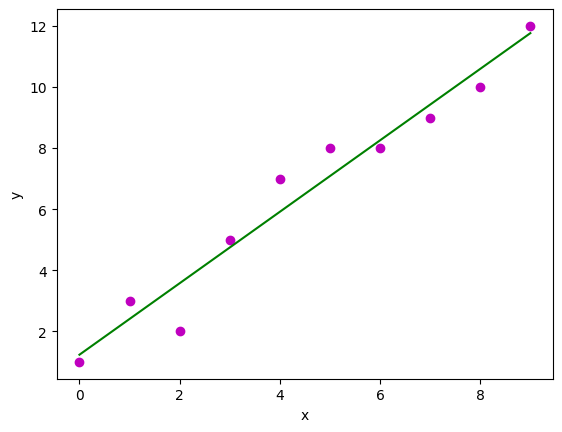

In [ ]:
#4.Regression
import numpy as np
import matplotlib.pyplot as plt
def estimate_coef(x, y):
  n = np.size(x)
  m_x= np.mean(x)
  m_y=np.mean(y)
  SS_xy =np.sum(y*x)-n*m_y*m_x
  SS_xx =np.sum(x*x)-n*m_x*m_x
  b_1 = SS_xy / SS_xx
  b_0 = m_y-b_1*m_x
  return(b_0,b_1)
def plot_regression_line(x, y, b):
  plt.scatter(x, y, color="m",)
  y_pred=b[0]+b[1]*x
  plt.plot(x,y_pred,color="g")
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()
def main():
  x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  b= estimate_coef(x, y)
  print("Estimated coefficients: \nb_0)={}\\ nb_1= {}".format(b[0], b[1]))
  plot_regression_line(x,y,b)
main()

In [ ]:
#5.RNN
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.layers.SimpleRNN(32, input_shape=(10,1)),keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
X_train = np.random.randn(100, 10, 1)
y_train = np.random.randn(100, 1)
model.fit(X_train, y_train, epochs=10, batch_size=32)
X_test = np.random.randn(10, 10, 1)
y_test = np.random.randn(10, 1)
model.evaluate(X_test, y_test)

Epoch 1/10
4/4 [==============================] - 3s 11ms/step - loss: 1.0377
Epoch 2/10
4/4 [==============================] - 0s 11ms/step - loss: 0.9143
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.8422
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.7957
Epoch 5/10
4/4 [==============================] - 0s 12ms/step - loss: 0.7694
Epoch 6/10
4/4 [==============================] - 0s 10ms/step - loss: 0.7541
Epoch 7/10
4/4 [==============================] - 0s 9ms/step - loss: 0.7396
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 0.7302
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.7220
Epoch 10/10
1/1 [==============================] - 0s 432ms/step - loss: 1.5722


1.5721710920333862

In [ ]:
#Image Captioning
import urllib
import requests
import os
urllib.request.urlretrieve("https://i.ibb.co/xY4DJJ5/img1.jpg", "img1.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Gnd1Y1L/img2.jpg", "img2.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Z6JgS1L/img3.jpg", "img3.jpg")
print('Images downloaded')
path = os.getcwd()
captionarr = [
 "This is the first caption",
 "This is the second caption",
 "This is the third caption"
 ]
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
print(os.getcwd())
def ext(file):
  index = file.find(".jpg")
  current_file = ""
  current_file = file[index:]
  return current_file
def ext2(file):
  index = file.find(".jpeg")
  current_file = ""
  current_file = file[index:]
  return current_file
def ext3(file):
  index = file.find(".png")
  current_file = ""
  current_file = file[index:]
  return current_file
def convert(words):
  s = ""
  for word in words:
    s += word.upper()
  return s
caption_first = convert(captionarr[0])
caption_second = convert(captionarr[1])
caption_third = convert(captionarr[2])
print(caption_first)
print(caption_second)
print(caption_third)
count = 0
for f in os.listdir('.'):
  try:
    if (ext(f) == '.jpg' or ext2(f) == '.jpeg' or ext3(f) == '.png'):
      img = Image.open(f)
      width, height = img.size
      basewidth = 1200
      wpercent = (basewidth / float(img.size[0]))
      hsize = int((float(img.size[1])*float(wpercent)))
      img = img.resize((basewidth, hsize), Image.ANTIALIAS)
      new_width, new_height = img.size
      if not img.mode == 'RGB':
        img = img.convert('RGB')
        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype("Arial Bold.ttf", 35)
        if count == 0:
          draw.text((new_width / 15 + 25, new_height - 100),caption_first, (255, 0, 0), font = font,align ="center")
        elif count == 1:
          draw.text((new_width / 15 + 25, new_height - 100),caption_second, (255, 0, 0), font = font,align ="center")
        else:
          draw.text(( new_width / 15 + 25, new_height - 100),caption_third, (255, 0, 0), font = font,align ="center")
        img.save("CaptionedImges/{}".format(f))
        print('done')
        count = count + 1
  except OSError:
    pass
import os
import glob
import shutil
fnames = []
for file in os.listdir('.'):
 fnames.append(file)
fnames.sort(key = lambda x: os.stat(x).st_ctime, reverse = True)

Images downloaded
/content
THIS IS THE FIRST CAPTION
THIS IS THE SECOND CAPTION
THIS IS THE THIRD CAPTION


<ipython-input-2-ca3056d2fa42>:54: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


In [ ]:
#Text to speech
!pip install gTTS
from gtts import gTTS
text_to_say="Welcome to the Text to Speech conversion session at Kalasalingam University"
language = 'en'
gtts_object = gTTS(text = text_to_say, lang = language, slow = False)
gtts_object.save("/content/gtts.wav")
from IPython.display import Audio
Audio("/content/gtts.wav")

In [ ]:
#9 CNN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10,batch_size=200, verbose=2)
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc*100:.2f}%')


Epoch 1/10
300/300 - 6s - loss: 0.3685 - accuracy: 0.8860 - 6s/epoch - 19ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1095 - accuracy: 0.9678 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0789 - accuracy: 0.9768 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0648 - accuracy: 0.9808 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0555 - accuracy: 0.9838 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0501 - accuracy: 0.9855 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0428 - accuracy: 0.9871 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0397 - accuracy: 0.9883 - 1s/epoch - 5ms/step
Epoch 9/10
300/300 - 1s - loss: 0.0359 - accuracy: 0.9891 - 1s/epoch - 5ms/step
Epoch 10/10
300/300 - 1s - loss: 0.0339 - accuracy: 0.9896 - 1s/epoch - 4ms/step
Test accuracy: 99.18%


In [ ]:
#Sequence Classification
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentences = [ "I love this product", "This is terrible", "Great job!", "Not good at all", "Awesome stuff" ]
labels = [1, 0, 1, 0, 1]
tokenizer = Tokenizer(num_words=1000, oov_token="")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
max_sequence_length = max([len(seq) for seq in sequences])
sequences_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding="post")
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(64))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
test_sentences = [ "This is very Bad", "I like it", "Excellent work" ]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences_padded = pad_sequences(test_sequences,maxlen=max_sequence_length, padding="post")
predictions = model.predict(test_sequences_padded)
for i, sentence in enumerate(test_sentences):
  sentiment = "Positive" if predictions[i] > 0.5 else "Negative"
  print(f"Sentence: '{sentence}' - Sentiment: {sentiment} ({predictions[i][0]:.2f})")

1/1 [==============================] - 1s 699ms/step
Sentence: 'This is very Bad' - Sentiment: Negative (0.50)
Sentence: 'I like it' - Sentiment: Positive (0.50)
Sentence: 'Excellent work' - Sentiment: Positive (0.50)


In [ ]:
#Prac
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist,imdb
from tensorflow.keras.layers import Flatten,Dense,Input,Conv2D,MaxPooling2D,Dropout,Embedding,Bidirectional,LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Model
sentences=["I am fine","Thank You","It is not good","Bad work","Good job"]
labels=[1,1,0,0,1]
tokenizer=Tokenizer(num_words=1000,oov_token="")
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(sentences)
maxlen=max([len(seq) for seq in sequences])
padseq=pad_sequences(sequences,maxlen=maxlen,padding="post")
model=Sequential([Embedding(input_dim=len(word_index)+1,output_dim=64,input_length=maxlen),LSTM
                  (64),Dense(1,activation="sigmoid")])
model.compile("adam","binary_crossentropy")


In [ ]:
#LSTM
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_features = 20000
maxlen = 200
inputs = Input(shape=(None,), dtype="int32")
x = Embedding(max_features, 128)(inputs)
x = Bidirectional(LSTM(64))(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)
model.summary()
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=max_features)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2757761 (10.52 MB)
Trainable params: 2757761 (1

1/1 [==============================] - 0s 88ms/step


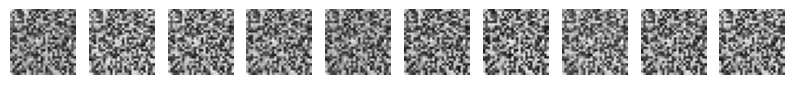

In [ ]:
#GAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Define the generator model
def build_generator(latent_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(Dense(784, activation='sigmoid'))
  model.add(Reshape((28, 28, 1)))
  return model
# Define the discriminator model
def build_discriminator(input_shape):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model
# Define the GAN model that combines the generator and discriminator
def build_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0
# Normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# Set hyperparameters
latent_dim = 100
epochs = 100
batch_size = 64
# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train[0].shape)
gan = build_gan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,
beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
# Training loop
for epoch in range(epochs):
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  real_images = X_train[idx]
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  generated_images = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)
# Print progress
if (epoch + 1) % 1000 == 0:
  print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss} - G Loss: {g_loss}")
# Save generated images at specified intervals
if (epoch + 1) % 1000 == 0:
  num_samples = 10
  noise = np.random.normal(0, 1, (num_samples, latent_dim))
  generated_images = generator.predict(noise)
  plt.figure(figsize=(10, 2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
    plt.close()
# Generate and save final images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.savefig("final_generated_images.png")
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model

# Create a toy dataset with synthetic audio data and labels
# In practice, you should replace this with your own dataset.
def generate_toy_dataset(num_samples, input_length, num_classes):
    X = np.random.rand(num_samples, input_length, 13)  # 13 features per time step (MFCCs)
    y = np.random.randint(num_classes, size=num_samples)
    return X, y

# Define the dataset parameters
num_samples = 1000
input_length = 100  # Length of the input sequence (time steps)
num_classes = 10   # Number of output classes (words or phonemes)

# Generate the toy dataset
X, y = generate_toy_dataset(num_samples, input_length, num_classes)

# Split the dataset into training and testing sets
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the RNN model
input_layer = Input(shape=(input_length, 13))
rnn_layer = SimpleRNN(units=64, activation='relu', return_sequences=False)(input_layer)
rnn_layer = SimpleRNN(units=32,activation='relu',return_sequences=False)(input_layer)
output_layer = Dense(num_classes, activation='softmax')(rnn_layer)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")


Epoch 1/10
20/20 [==============================] - 3s 52ms/step - loss: 2.3988 - accuracy: 0.0734 - val_loss: 2.3253 - val_accuracy: 0.0938
Epoch 2/10
20/20 [==============================] - 1s 35ms/step - loss: 2.3278 - accuracy: 0.0859 - val_loss: 2.3229 - val_accuracy: 0.0938
Epoch 3/10
20/20 [==============================] - 1s 37ms/step - loss: 2.3044 - accuracy: 0.1047 - val_loss: 2.3218 - val_accuracy: 0.1000
Epoch 4/10
20/20 [==============================] - 1s 46ms/step - loss: 2.2929 - accuracy: 0.1234 - val_loss: 2.3277 - val_accuracy: 0.0938
Epoch 5/10
20/20 [==============================] - 1s 53ms/step - loss: 2.2839 - accuracy: 0.1312 - val_loss: 2.3303 - val_accuracy: 0.0875
Epoch 6/10
20/20 [==============================] - 1s 57ms/step - loss: 2.2763 - accuracy: 0.1453 - val_loss: 2.3355 - val_accuracy: 0.0875
Epoch 7/10
20/20 [==============================] - 1s 60ms/step - loss: 2.2697 - accuracy: 0.1406 - val_loss: 2.3358 - val_accuracy: 0.0750
Epoch 8/10
20

ValueError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
# Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)  # Convert labels to one-hot encoding
y_test = to_categorical(y_test, 10)
# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy*100:.2f}%")


Length of text: 1115394 characters
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

65 unique characters
F
i
r
s
t
 
C
i
t
i
tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)
b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


AttributeError: ignored

Epoch 1/10
25/25 [==============================] - 1s 4ms/step - loss: 0.2314
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 8.9195e-04
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 9.3782e-05
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 3.8406e-05
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 2.3673e-05
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 1.6862e-05
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 1.2037e-05
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 9.2641e-06
Epoch 10/10
1/1 [==============================] - 0s 35ms/step


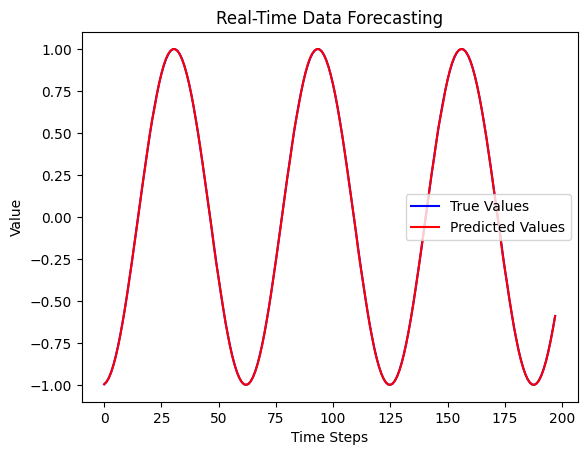

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generate synthetic data (sine wave)
t = np.arange(0, 100, 0.1)
data = np.sin(t)

# Split data into input sequences and target values
sequence_length = 10  # Number of past values to consider
x_data, y_data = [], []
for i in range(len(data) - sequence_length):
    x_data.append(data[i:i+sequence_length])
    y_data.append(data[i+sequence_length])

x_data = np.array(x_data)
y_data = np.array(y_data)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(x_data))
x_train, x_test = x_data[:split_index], x_data[split_index:]
y_train, y_test = y_data[:split_index], y_data[split_index:]

# Create an RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Make real-time predictions
predicted_values = []
for i in range(len(x_test)):
    x_input = x_test[i:i+1]
    y_pred = model.predict(x_input)
    predicted_values.append(y_pred[0][0])

# Plot the results
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predicted_values, label='Predicted Values', color='red')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Real-Time Data Forecasting')
plt.show()


In [ ]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.layers import TextVectorization

seed = 111
np.random.seed(seed)
tf.random.set_seed(seed)
SEQ_LENGTH=20
VOCAB_SIZE=10000
def load_captions_data(filename):
    """Loads captions (text) data and maps them to corresponding images.

    Args:
        filename: Path to the text file containing caption data.

    Returns:
        caption_mapping: Dictionary mapping image names and the corresponding captions
        text_data: List containing all the available captions
    """


    with open(filename) as caption_file:
        caption_data = caption_file.readlines()
        caption_mapping = {}
        text_data = []
        images_to_skip = set()

        for line in caption_data:
            line = line.rstrip("\n")
            # Image name and captions are separated using a tab
            img_name, caption = line.split("\t")

            # Each image is repeated five times for the five different captions.
            # Each image name has a suffix `#(caption_number)`
            img_name = img_name.split("#")[0]
            img_name = os.path.join(r"C:\Users\anwar\Desktop\Flicker8k_Dataset", img_name.strip())

            # We will remove caption that are either too short to too long
            tokens = caption.strip().split()

            if len(tokens) < 5 or len(tokens) > SEQ_LENGTH:
                images_to_skip.add(img_name)
                continue

            if img_name.endswith("jpg") and img_name not in images_to_skip:
                # We will add a start and an end token to each caption
                caption = "<start> " + caption.strip() + " <end>"
                text_data.append(caption)

                if img_name in caption_mapping:
                    caption_mapping[img_name].append(caption)
                else:
                    caption_mapping[img_name] = [caption]

        for img_name in images_to_skip:
            if img_name in caption_mapping:
                del caption_mapping[img_name]

        return caption_mapping, text_data


def train_val_split(caption_data, train_size=0.8, shuffle=True):
    """Split the captioning dataset into train and validation sets.

    Args:
        caption_data (dict): Dictionary containing the mapped caption data
        train_size (float): Fraction of all the full dataset to use as training data
        shuffle (bool): Whether to shuffle the dataset before splitting

    Returns:
        Traning and validation datasets as two separated dicts
    """

    # 1. Get the list of all image names
    all_images = list(caption_data.keys())

    # 2. Shuffle if necessary
    if shuffle:
        np.random.shuffle(all_images)

    # 3. Split into training and validation sets
    train_size = int(len(caption_data) * train_size)

    training_data = {
        img_name: caption_data[img_name] for img_name in all_images[:train_size]
    }
    validation_data = {
        img_name: caption_data[img_name] for img_name in all_images[train_size:]
    }

    # 4. Return the splits
    return training_data, validation_data


# Load the dataset
captions_mapping, text_data = load_captions_data("Flickr8k.token.txt")

# Split the dataset into training and validation sets
train_data, valid_data = train_val_split(captions_mapping)
print("Number of training samples: ", len(train_data))
print("Number of validation samples: ", len(valid_data))
def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")


strip_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
strip_chars = strip_chars.replace("<", "")
strip_chars = strip_chars.replace(">", "")

vectorization = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQ_LENGTH,
    standardize=custom_standardization,
)
vectorization.adapt(text_data)

# Data augmentation for image data
image_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomContrast(0.3),
    ]
)


Number of training samples:  5493
Number of validation samples:  1374


In [ ]:
# importing required libraries
import urllib
import requests
import os

# retrieving using image url
urllib.request.urlretrieve("https://i.ibb.co/xY4DJJ5/img1.jpg", "img1.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Gnd1Y1L/img2.jpg", "img2.jpg")
urllib.request.urlretrieve("https://i.ibb.co/Z6JgS1L/img3.jpg", "img3.jpg")

print('Images downloaded')

# get current working directory path
path = os.getcwd()

captionarr = [
    "This is the first caption",
    "This is the second caption",
    "This is the third caption"
    ]
    # importing necessary functions from PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

print(os.getcwd())

# checking the file mime types if
# it is jpg, png or jpeg
def ext(file):
    index = file.find(".jpg")
    current_file = ""
    current_file = file[index:]
    return current_file

def ext2(file):
    index = file.find(".jpeg")
    current_file = ""
    current_file = file[index:]
    return current_file

def ext3(file):
    index = file.find(".png")
    current_file = ""
    current_file = file[index:]
    return current_file

# converting text from lowercase to uppercase
def convert(words):
    s = ""
    for word in words:
        s += word.upper()
    return s

caption_first = convert(captionarr[0])
caption_second = convert(captionarr[1])
caption_third = convert(captionarr[2])

print(caption_first)
print(caption_second)
print(caption_third)

count = 0

for f in os.listdir('.'):
    try:
        # Checking for file types if jpg, png
        # or jpeg excluding other files
        if (ext(f) == '.jpg' or ext2(f) == '.jpeg' or ext3(f) == '.png'):
            img = Image.open(f)
            width, height = img.size
            basewidth = 1200
            # print(height)

            # Resizing images to same width height
            wpercent = (basewidth / float(img.size[0]))
            hsize = int((float(img.size[1])*float(wpercent)))
            img = img.resize((basewidth, hsize), Image.ANTIALIAS)
            new_width, new_height = img.size

            # print(new_height)
            # changing image mode if not in RGB
            if not img.mode == 'RGB':
                img = img.convert('RGB')

            draw = ImageDraw.Draw(img)
            # font = ImageFont.truetype(<font-file>, <font-size>)
            # initializing which font will be chosen by us
            font = ImageFont.truetype("Arial Bold.ttf", 35)

             # First Caption on First image
            if count == 0:
                draw.text((new_width / 15 + 25, new_height - 100),
                           caption_first, (255, 0, 0), font = font,
                           align ="center")

            # Second Caption on Second image
            elif count == 1:
                draw.text((new_width / 15 + 25, new_height - 100),
                          caption_second, (255, 0, 0), font = font,
                          align ="center")

            # Third Caption on Third image
            else:
                draw.text(( new_width / 15 + 25, new_height - 100),
                            caption_third, (255, 0, 0), font = font,
                            align ="center")

            img.save("CaptionedImges/{}".format(f))
            print('done')
            count = count + 1

    except OSError:
        pass
        import os
import glob
import shutil


fnames = []
for file in os.listdir('.'):
    # appending files in directory to the frames arr
    fnames.append(file)

# sorting the files in frames array
# on the basis of last modified time
# reverse = True means ascending order sorting
fnames.sort(key = lambda x: os.stat(x).st_ctime, reverse = True)
#9921005011

Images downloaded
/content
THIS IS THE FIRST CAPTION
THIS IS THE SECOND CAPTION
THIS IS THE THIRD CAPTION


<ipython-input-1-c6c5b9a45f7d>:78: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth, hsize), Image.ANTIALIAS)


In [ ]:
#Practice
#RNN model
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the RNN model
model = models.Sequential()

# Define the input sequence length (adjust as needed)
sequence_length = 50
input_features = 10

# Add an Embedding layer (optional, for text data)
# model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_length))

# Add a SimpleRNN layer
model.add(layers.SimpleRNN(64, activation='relu', input_shape=(sequence_length, input_features), return_sequences=True))

# Add another SimpleRNN layer (optional)
# model.add(layers.SimpleRNN(64, activation='relu', return_sequences=True))

# Add a Dense layer for classification (or regression)
model.add(layers.Dense(1))  # 1 output unit for binary classification (adjust as needed)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use appropriate loss for your task
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 64)            4800      
                                                                 
 dense_47 (Dense)            (None, 50, 1)             65        
                                                                 
Total params: 4865 (19.00 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Practice
#CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the previous layer
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # 10 classes for classification (adjust as needed)

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_13 (Flatten)        (None, 1024)            

In [ ]:
#PRACTICE

import pandas as pd

# Load the Excel file into a DataFrame
df = pd.read_excel("Book1.xlsx")

# Assuming 'Absent' is the column indicating absenteeism
absent_column = 'Abentees'

# Count the number of absent students
absent_count = len(df[df[absent_column] == 'A'])

print(f"Number of absent students: {absent_count}")


Number of absent students: 13


In [ ]:
#5.RNN
import numpy as np
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.layers.SimpleRNN(32, input_shape=(10,1)),keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
X_train = np.random.randn(100, 10, 1)
y_train = np.random.randn(100, 1)
model.fit(X_train, y_train, epochs=10, batch_size=32)
X_test = np.random.randn(10, 10, 1)
y_test = np.random.randn(10, 1)
model.evaluate(X_test, y_test)

Epoch 1/10
4/4 [==============================] - 1s 10ms/step - loss: 1.3192
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 1.2401
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 1.2029
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1909
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1785
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 1.1635
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1516
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1370
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 1.1232
Epoch 10/10
1/1 [==============================] - 0s 260ms/step - loss: 1.2411


1.2410557270050049

In [ ]:
#Nanochip code 5/10/23
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nlp import load_dataset
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
dataset =

train = dataset['train']
val = dataset['validation']
test = dataset['test']
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels
tweets, labels = get_tweet(train)
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)
maxlen=50
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding='post', maxlen=maxlen)
  return padded
classes = set(labels)
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k, v in class_to_index.items())
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])
train_labels = names_to_ids(labels)
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,16,input_length=maxlen),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels= names_to_ids(val_labels)
h = model.fit(
     padded_train_seq, train_labels,
     validation_data=(val_seq, val_labels),
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)
test_tweets, test_labels=get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels=names_to_ids(test_labels)
model.evaluate(test_seq, test_labels)

#

i = random.randint(0,len(test_labels)-1)
print('Sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])
p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
print(test_seq[i])
pred_class=index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion: ', pred_class)

sentence = 'i am not sure what to do'
sequence = tokenizer.texts_to_sequences([sentence])
paddedSequence = pad_sequences(sequence, truncating = 'post', padding='post', maxlen=maxlen)
p = model.predict(np.expand_dims(paddedSequence[0], axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]
print('Sentence:', sentence)
print('Predicted Emotion: ', pred_class)

Saving train.txt to train (3).txt


ValueError: ignored

Total time spanning: 2.0 days
0.173 % of all transactions are fraud. 


<ipython-input-8-84394b0529e6>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  (sns.distplot)(df[cn][df.Class ==1], bins=50)
<ipython-input-8-84394b0529e6>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cn][df.Class ==0], bins=50)
<ipython-input-8-84394b0529e6>:23: UserWarning: 

`distplot` is a depr

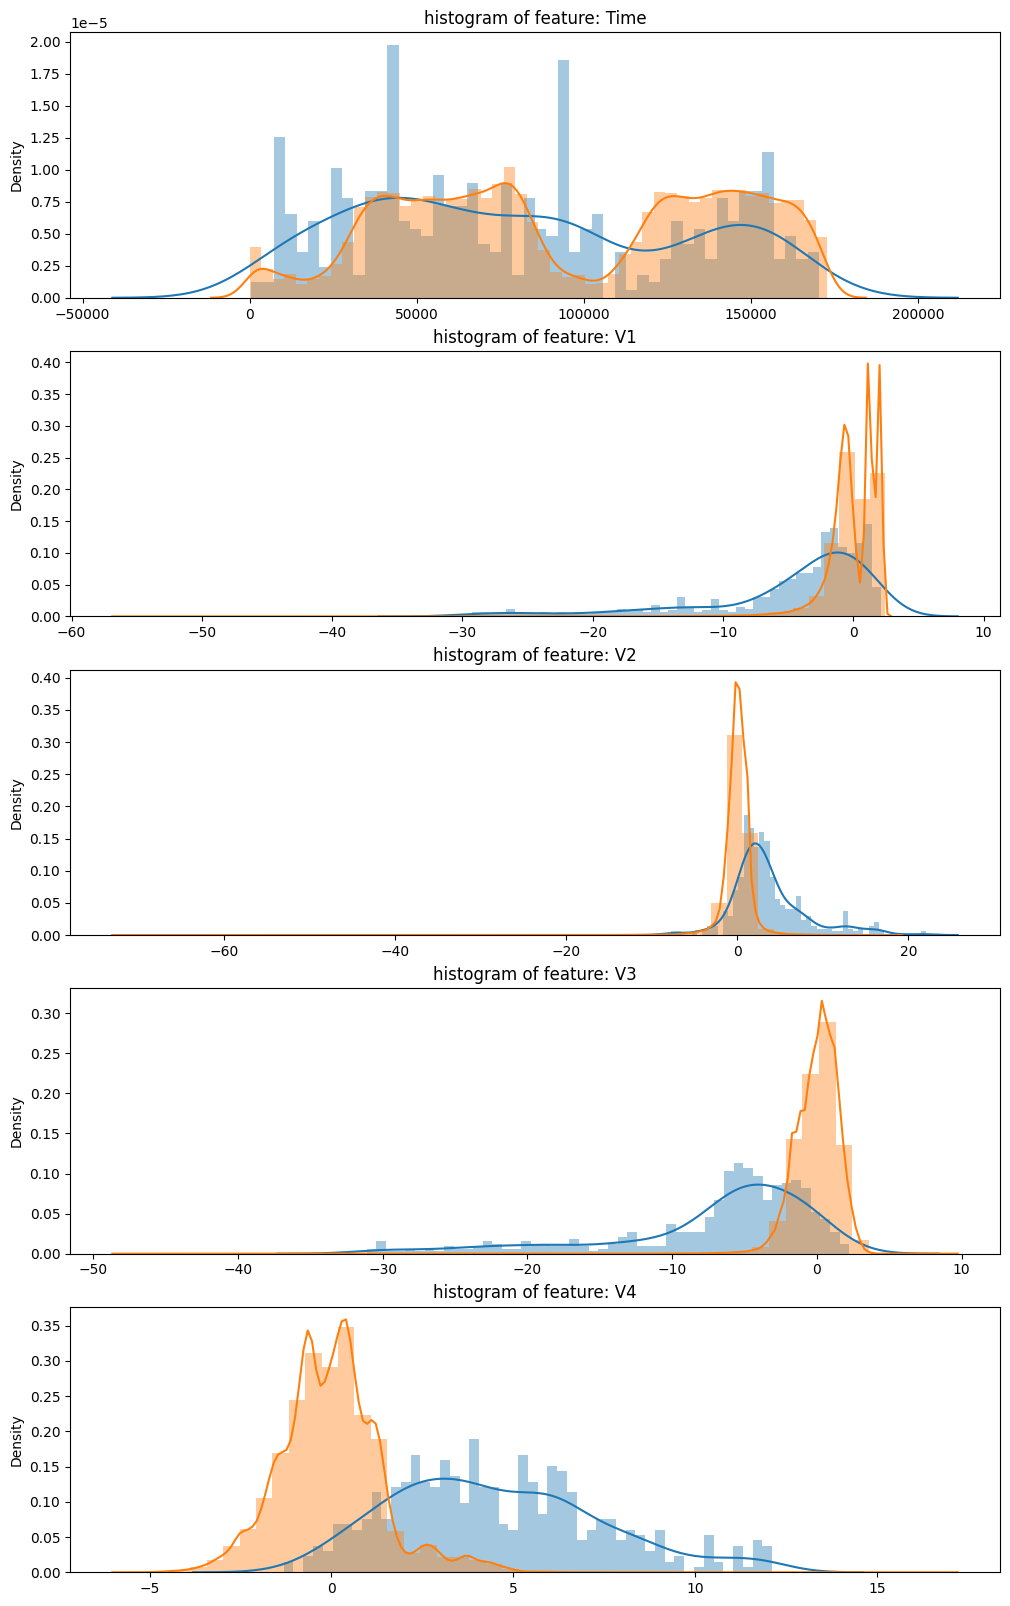

Total train examples: 213605, total fraud cases: 398, equal to 0.00186 of total cases. 
Total test examples: 71202, total fraud cases: 94, equal to 0.00132 of total cases. 
Epoch: 0001 cost= 0.456395775 Train auc= 0.963880 Time elapsed= 0:00:02.728218
Epoch: 0002 cost= 0.689124048 Train auc= 0.962692 Time elapsed= 0:00:03.916100
Epoch: 0003 cost= 0.357209742 Train auc= 0.962906 Time elapsed= 0:00:05.513296
Epoch: 0004 cost= 0.671113789 Train auc= 0.962410 Time elapsed= 0:00:07.157205
Epoch: 0005 cost= 0.969763756 Train auc= 0.962201 Time elapsed= 0:00:08.342486
Epoch: 0006 cost= 0.399433762 Train auc= 0.962427 Time elapsed= 0:00:09.516809
Epoch: 0007 cost= 0.410738319 Train auc= 0.962860 Time elapsed= 0:00:10.696871
Epoch: 0008 cost= 0.365707248 Train auc= 0.962267 Time elapsed= 0:00:11.905284
Epoch: 0009 cost= 0.260434896 Train auc= 0.962284 Time elapsed= 0:00:13.087555
Epoch: 0010 cost= 0.629540741 Train auc= 0.961718 Time elapsed= 0:00:14.251631
Optimization Finished!
Model saved in

In [8]:
import pandas as pd #data manipulation
import numpy as np #matrix math
import tensorflow as tf #machine learning
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os #saving files
from datetime import datetime #logging
from sklearn.metrics import roc_auc_score as auc #measuring accuracy
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec
df = pd.read_csv('creditcard.csv')
df.shape
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0]* 100))
df.head()
df.columns
df.dtypes
plt.figure(figsize=(12,5*4))
gs= gridspec.GridSpec(5,1)
for i, cn in enumerate(df.columns[:5]):
    ax= plt.subplot(gs[i])
    (sns.distplot)(df[cn][df.Class ==1], bins=50)
    sns.distplot(df[cn][df.Class ==0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: '+ str(cn))
plt.show()
TEST_RATIO = 0.25
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-TEST_RATIO) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values
test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))
cols_max = []
cols_min = []
for c in range(train_x.shape[1]):
    cols_max.append(train_x[:,c].max())
    cols_min.append(train_x[:,c].min())
    train_x[:, c] = (train_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
    test_x[:, c] = (test_x[:, c] - cols_min[-1]) / (cols_max[-1] - cols_min[-1])
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] = (test_x[:, c] - cols_mean[-1]) / cols_std[-1]
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
n_hidden_1 = 15
n_input = train_x.shape[1]
X = tf.placeholder("float", [None, n_input])
weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    # 'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    # 'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    # 'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    # 'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}
# Building the encoder


def encoder(x):
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),biases['encoder_b1']))
    return layer_1


def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                biases['decoder_b1']))
    return layer_1

encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
y_pred = decoder_op
y_true = X
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
save_model = os.path.join("C:\\Users\\anwar\Desktop\\New folder",'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0] / batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
          train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
          print("Epoch:", '%04d' % (epoch + 1),"cost=", "{:.9f}".format(c),"Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)),"Time elapsed=", "{}".format(datetime.now() - now))
          save_path = saver.save(sess, save_model)
print("Optimization Finished!")
print("Model saved in file: %s" % save_path)


In [16]:
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-webscraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')
with open('infoboxes.json', 'r') as file:
 wiki_data = json.load(file)
wiki_data[0]
for i in range(0,3):
 print(wiki_data[i]['products'])
 print('\n')
regex = re.compile(r'[\w\s-]+')
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']
products = []
data = []
for x in wiki_data:
  product = x['products'].lower()
  product = product.replace(' and ', '|').replace(']]', '')
  product = regex.findall(product) # extract all alphanumeric occurences
  product = [p.strip() for p in product] # get rid of leading or trailing whitespace
  # filter rogue words and de-duplicate
  product = list(set([p for p in product if p not in rogue_words]))
  # add to data
  data.append({'wiki_title' : x['company_name'], 'product' : ', '.join(product)})
  # add to list of products
  products.extend(product)
print(products)

def create_wordcloud(items, stopwords=[]):
  text = ' '.join(items)
  wordcloud = WordCloud(width=1600, height=800, margin=0, stopwords=stopwords).generate(text)
  plt.figure( figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()
create_wordcloud(products)
for i in range(0,5):
  print(wiki_data[i]['industry'])
  industries = []
for i, x in enumerate(wiki_data):
  industry = x['industry'].lower()
  industry = industry.replace(' and ', '|').replace(']]', '')
  industry = regex.findall(industry)
  industry = [i.strip() for i in industry]
  industry = list(set([i for i in industry if i not in rogue_words]))
  data[i]['industry'] = ', '.join(industry)
  industries.extend(industry)
print(industries)
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list
for i in range(0,len(wiki_data)):
  print(wiki_data[i]['assets'])
  regex1 = re.compile('([\d\.]+)')
  regex2 = re.compile('(billion|trillion)')
  assets = []
for i, x in enumerate(wiki_data):
  y = x['assets'] # get assets
  z = regex1.findall(y)[0] # extract assets
  unit = regex2.findall(y)[0] # extract the unit
  asset = float(z) # convert to the numeric
  data[i]['assets'] = str(asset) + ' ' + unit # add to data
  # add to list of assets
  assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})
assets
for i, asset in enumerate(assets):
  if asset['unit'] == 'trillion':
    assets[i]['value'] = asset['value'] * 1000
    assets[i]['unit'] = 'billion'
df_assets = pd.DataFrame(assets)
df_assets
ax = df_assets.plot(kind='bar', title ="Assets from the Top 20 Companies on Fortune 500",color='skyblue',figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()
df_wiki = pd.DataFrame(data)
df_wiki.head()
df = pd.read_csv('fortune_500_companies.csv', nrows=20)
df = pd.concat([df, df_wiki], axis=1)
df
df.to_csv('top_20_companies.csv', index=False)


HTTPError: HTTP Error 404: Not Found